<a href="https://colab.research.google.com/github/fedhere/MLPNS_FBianco/blob/main/clustering/StellarPopClustersLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster


# data from this paper: color magnitude diagrams of NGC 2808: https://arxiv.org/pdf/1906.04983.pdf


In [51]:
cmag = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/clustering/colormag_NGC2808.csv", header=None)
cmag


,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


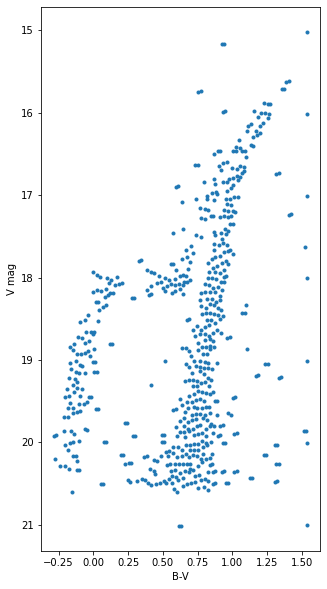

In [3]:
pl.figure(figsize=(5,10))

pl.plot(cmag.iloc[:,0], cmag.iloc[:,1], '.')
pl.xlabel("B-V")
pl.ylabel("V mag")
pl.gca().invert_yaxis()

In [4]:
X = preprocessing.scale(cmag, axis=0)

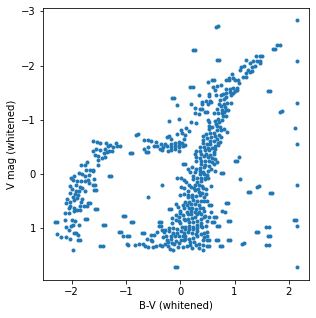

In [5]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
ax.set_aspect('equal')
ax.plot(X[:,0], X[:,1], '.')
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

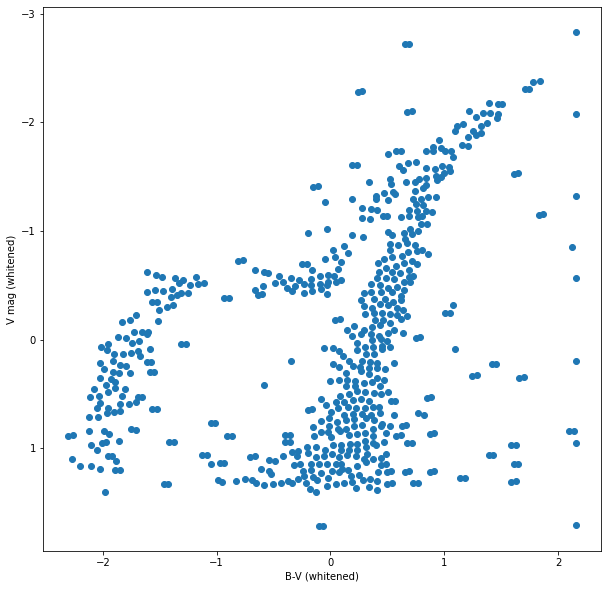

In [6]:
pl.figure(figsize=(10,10))

pl.scatter(X[:,0], X[:,1])
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

In [7]:
km = skl.cluster.KMeans(3).fit(X)
km.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


336.09752492000223

649.0390727521626
336.12995708629114
293.3699574057963
192.47303267419989
161.47521359631946
136.45481467814867
117.55417751080417
97.49570048306946


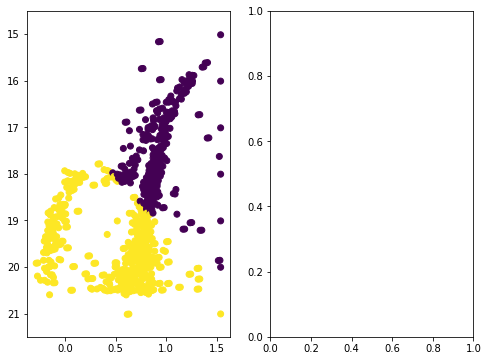

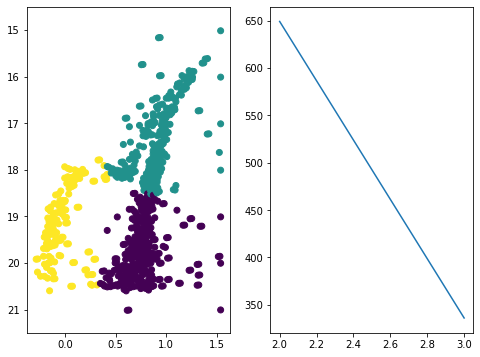

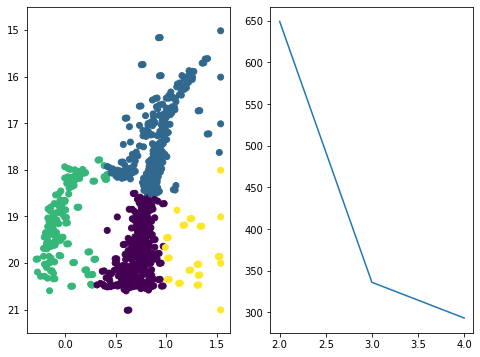

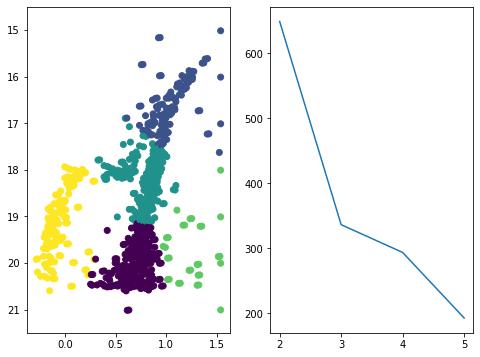

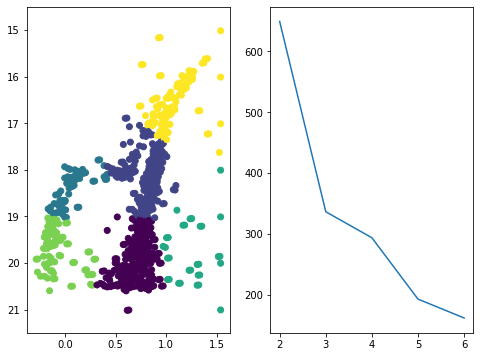

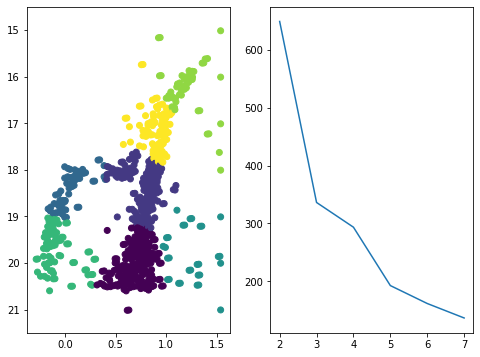

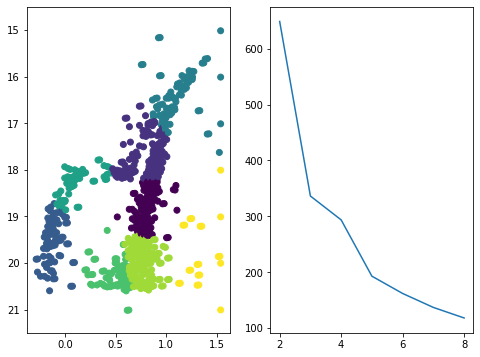

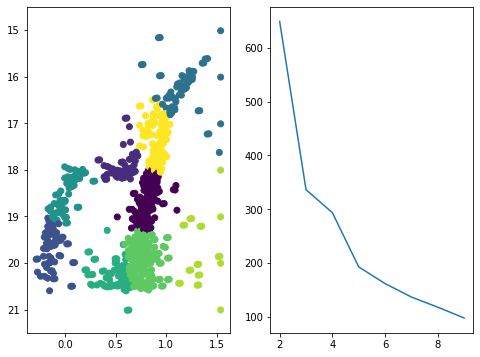

In [49]:
tv = []
for i in range(2, 10):
    km = skl.cluster.KMeans(i, n_init='auto',
                            random_state=302).fit(X)
    tv.append(km.inertia_)
    print(km.inertia_)
    fig, ax = pl.subplots(1, 2, figsize=(8,6))
    ax[0].scatter(cmag.iloc[:,0], 
                 cmag.iloc[:,1],  
                 cmap="viridis", c=(km.labels_ + 1) /4)
    
    ax[0].set_ylim(21.5, 14.5)
    if i>2:
      ax[1].plot(range(2,i+1), tv)

In [25]:
# what does the distribution of distances to the closest object look like ?
# this might help chose the hyperparameter cmin
dm = sp.spatial.distance.squareform(sp.spatial.distance.pdist(X))
dm[dm == 0] = dm.max()

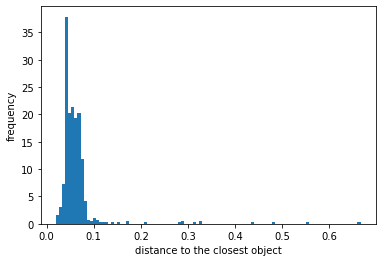

In [26]:
pl.hist(dm.min(0), bins=100, density=True);
pl.ylabel("frequency")
pl.xlabel("distance to the closest object");

In [27]:
dbs = skl.cluster.DBSCAN(eps=0.2, min_samples=8)
dbs.fit(X)

DBSCAN(eps=0.2, min_samples=8)

In [28]:
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(3, 83, 601)

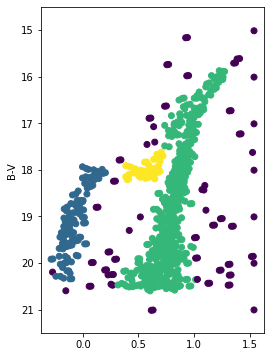

In [43]:
pl.figure(figsize=(4,6))

pl.scatter(cmag.iloc[:, 0], 
           cmag.iloc[:, 1],
            c=(labels + 1) /4);
pl.ylim(21.5, 14.5)
pl.ylabel("V")
pl.ylabel("B-V");

In [50]:
cluster.DBSCAN?